<a href="https://colab.research.google.com/github/JohanFendi/PredictHousePrices/blob/main/PredictHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
  file_path = Path("datasets/housing.tgz")
  if not file_path.is_file():
    Path("datasets").mkdir(exist_ok = True, parents = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, file_path)
    with tarfile.open(file_path) as housing_tarball:
      housing_tarball.extractall(path = "datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_data = load_housing_data()


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

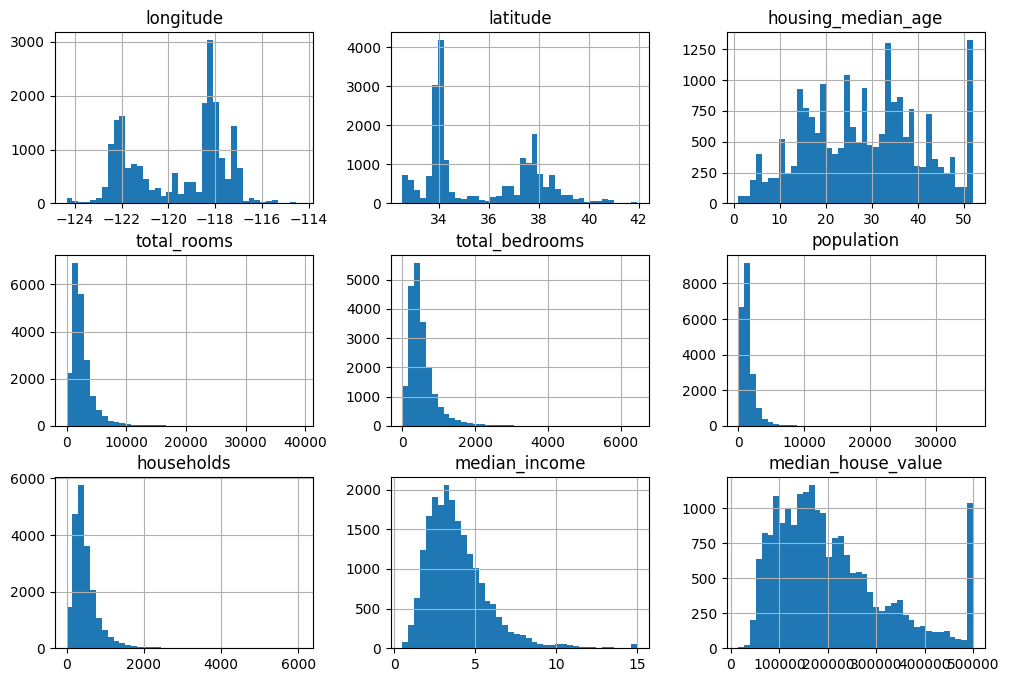

In [ ]:
housing_data.hist(bins=40, figsize=(12,8))

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

#Returns test_set, then train_set //The hard and biased way
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[test_indices], data.iloc[train_indices]


#Returns train, test //The easy and good way
housing_data["income_category"] = pd.cut(housing_data["median_income"], bins = [0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])
train_set, test_set = train_test_split(housing_data, stratify = housing_data["income_category"], test_size = 0.2, random_state = 42)


<Axes: xlabel='income_category'>

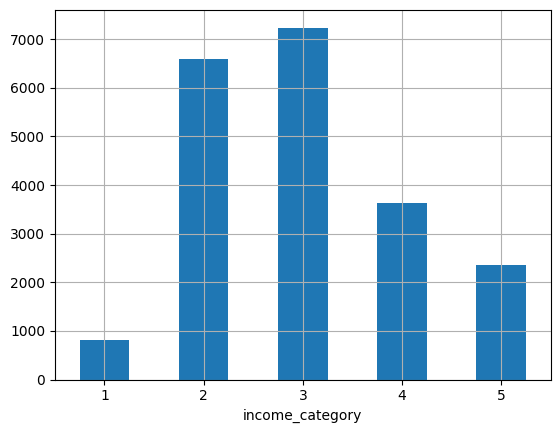

In [ ]:
housing_data["income_category"].value_counts().sort_index().plot.bar(rot=0, grid = True)

In [3]:
print(train_set["income_category"].value_counts() / len(train_set["income_category"]))
print(test_set["income_category"].value_counts() / len(test_set["income_category"]))

income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


<Axes: xlabel='longitude', ylabel='latitude'>

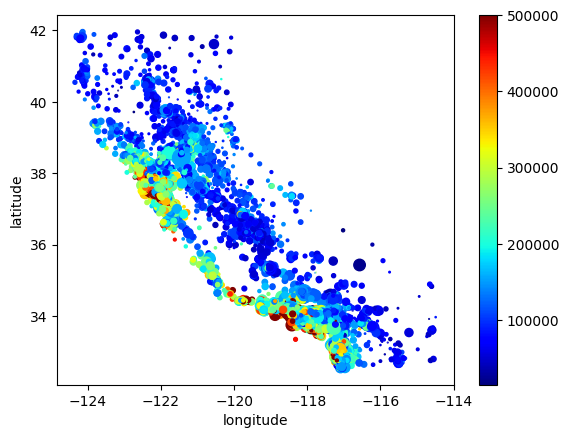

In [6]:
temp_housing_data = train_set.copy()
temp_housing_data.drop(columns = ["ocean_proximity"], inplace = True)
temp_housing_data.plot(kind="scatter", x="longitude", y="latitude", s=temp_housing_data['population']/100,
                       c = temp_housing_data['median_house_value'], colorbar = "true" ,cmap = "jet")

In [ ]:

corr_matrix = temp_housing_data.corr()
print(corr_matrix["median_house_value"].sort_values())

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
income_category       0.642887
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

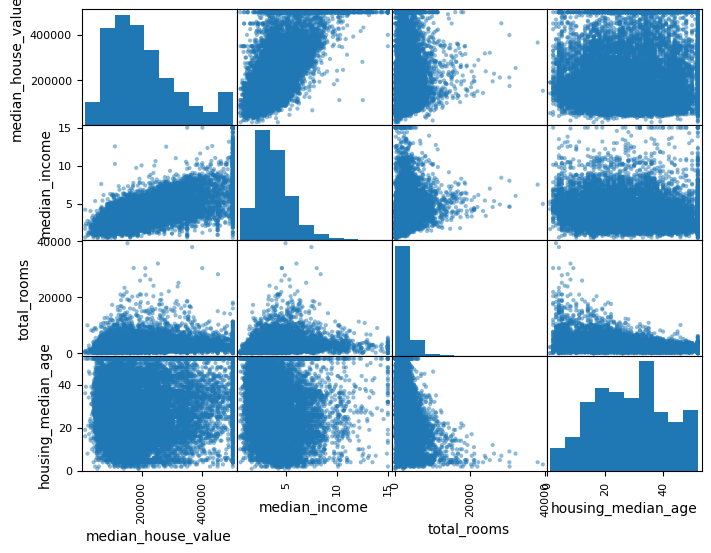

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(temp_housing_data[attributes], figsize = (8,6))

In [7]:
temp_housing_data["rooms_per_house"] = temp_housing_data['total_rooms'] / temp_housing_data['households']
temp_housing_data["bedroom_ratio"] = temp_housing_data['total_bedrooms'] / temp_housing_data['total_rooms']
temp_housing_data["people_per_house"] = temp_housing_data['population'] / temp_housing_data['households']
temp_housing_data["bedrooms_per_house"] = temp_housing_data["total_bedrooms"] / temp_housing_data['households']
corr_matrix = temp_housing_data.corr()
print(corr_matrix['median_house_value'].sort_values())

bedroom_ratio        -0.256397
latitude             -0.139584
longitude            -0.050859
bedrooms_per_house   -0.045545
people_per_house     -0.038224
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
rooms_per_house       0.143663
income_category       0.642887
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64


In [5]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_category     20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB
None


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSmimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, gamma=10, num_clusters = 10, random_state=None):
      self.gamma = gamma
      self.num_clusters = num_clusters
      self.random_state = random_state

    def fit(self, X, sample_weight=None, y=None):
      self._kMeans = KMeans(n_clusters=self.num_clusters, random_state=self.random_state)
      self._kMeans.fit(X, sample_weight=sample_weight)
      return self

    def transform(self, X):
      return rbf_kernel(X, self._kMeans.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names = None):
      return [f"Cluster {i} similarity" for i in range(self.num_clusters)]



In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_array, check_is_fitted, validate_data

class KNNSimilarity(TransformerMixin, BaseEstimator):
  _FEATURE_NAMES_ERROR = "FeatureNamesError: Feature names can not be none."
  def __init__(self, n_neighbors=5, weights="uniform"):
    self.n_neighbors = n_neighbors
    self.weights = weights

  def fit(self, X, y=None):
    check_array(X)
    self.KNNregressor_ = KNeighborsRegressor(n_neighbors=self.n_neighbors, weights=self.weights)
    self.KNNregressor_.fit(X, y)
    self.n_features_in_ = self.KNNregressor_.n_features_in_
    return self

  def transform(self, X):
    predictions = self.KNNregressor_.predict(X)
    if predictions.ndim == 1:
      predictions = predictions.reshape(-1, 1)
    return predictions

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
      raise ValueError(KNNSimilarity._FEATURE_NAMES_ERROR)
    return [f"{name}_KNN" for name in input_features]




In [29]:

class StandardScalerClone(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    X = validate_data(self, X, ensure_2d=True)
    self.n_features_in_ = X.shape[1]
    self.stds_ = np.std(X, axis=0, ddof=1)
    self.means_ = np.mean(X, axis=0)
    return self

  def transform(self, X):
    check_is_fitted(self)
    X = validate_data(self, X, ensure_2d=True, reset=False)
    return (X - self.means_) / self.stds_

  def inverse_transform(self, X):
    check_is_fitted(self)
    X = validate_data(self, X, ensure_2d=True, reset=False)
    return X * self.stds_ + self.means_

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
      return [f"X{i}" for i in range(self.n_features_in_)]

    if len(input_features) != self.n_features_in_:
      raise ValueError("Number of input features must equal self.n_features_in_.")

    if hasattr(self, "feature_names_in_") and not np.all(self.feature_names_in_ == input_features):
      raise ValueError("input_features not equal self.feature_names_in_.")

    return input_features






In [30]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

[{'estimator': StandardScalerClone(),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': StandardScalerClone(),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': StandardScalerClone(),
  'check_name': 'check_estimator_tags_renamed',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': StandardScalerClone(),
  'check_name': 'check_valid_tag_types',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': StandardScalerClone(),
  'check_name': 'check_estimator_repr',
  'exception': None,
  'status': 'passed',
  'expec

In [21]:
#Creating main preprocessing pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel


#Takes DF Columns and returns ratio
def ratio(df):
  return df[:, [0]] / df[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline() :
    return make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(ratio, feature_names_out=ratio_name),
    StandardScaler()
)


def log_pipeline():
    return make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

def category_pipeline():
    return make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

def num_pipeline():
    return make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cluster_pipeline = ClusterSmimilarity(random_state=42)
knn_pipeline = KNNSimilarity()

preprocessing_pipeline = ColumnTransformer([
    ("bedroom", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline(),  ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("category", category_pipeline(), ["ocean_proximity"]),
    ("geo", cluster_pipeline, ["longitude, latitude"])
    #("knn", knn_pipeline, ["longitude", "latitude"])
    ],
    remainder=num_pipeline()
)

In [14]:
train_housing_labels = median_house_value = train_set["median_house_value"]
train_data = train_set.drop(columns = ["median_house_value", "income_category"])

In [15]:
preprocessed_data = preprocessing_pipeline.fit_transform(train_set, train_housing_labels)
print(preprocessing_pipeline.get_feature_names_out())
print(preprocessed_data.shape)


['bedroom__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income'
 'category__ocean_proximity_<1H OCEAN' 'category__ocean_proximity_INLAND'
 'category__ocean_proximity_ISLAND' 'category__ocean_proximity_NEAR BAY'
 'category__ocean_proximity_NEAR OCEAN' 'knn__longitude_KNN'
 'knn__latitude_KNN' 'remainder__housing_median_age'
 'remainder__median_house_value' 'remainder__income_category']
(16512, 17)


In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestRegressor

#TODO, implement sv_regressor
svr_pipeline = Pipeline([
                        ("preprocessing", preprocessing_pipeline),
                        ("select", SelectFromModel(RandomForestRegressor(random_state=42), threshold=0.1)),
                        ("svr", SVR())
                         ])

param_dist = {
      "svr__kernel": ["linear", "rbf"],
      "svr__C": uniform(1,100000),
      "svr__gamma": uniform(0.01, 1),
     }

param_grid = {"svr__kernel": ["rbf"], "svr__C":[10000*i for i in range(6,9)], "svr__gamma":[0.1*i for i in range(1,4)], "preprocessing__knn__n_neighbors":[3,4,5] }

svr_model = GridSearchCV(svr_pipeline, param_grid, scoring="neg_root_mean_squared_error", cv=3)
svr_train_data_and_labels = train_set.sample(n=4000, random_state=42).copy()
svr_train_data = svr_train_data_and_labels.drop(columns=["median_house_value"])
svr_train_labels = svr_train_data_and_labels["median_house_value"]
svr_model.fit(svr_train_data, svr_train_labels)



/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedroom',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<fu...
                                                                         ['ocean_proximity']),
                                                                        ('knn',
                                                                         KNNSimilarity(),
                                                                         ['longitude',
                                                                          'latitude'])])),
                                       ('select',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                                        threshold=0.1)),
                                       ('svr', SVR())]),
             param_grid={'preprocessing__knn__n_neighbors': [3, 4, 5],
                         'svr__C': [60000, 70000, 80000],
                         'svr__gamma': [0.1, 0.2, 0.30000000000000004],
                         'svr__kernel': ['rbf']},
             scoring='neg_root_mean_squared_error')

In [20]:
from sklearn.metrics import mean_squared_error
svr_best_model = svr_model.best_estimator_
test_data = test_set.drop(columns=["median_house_value"])
test_labels = test_set['median_house_value']
svr_predictions = svr_best_model.predict(test_data)
mse = np.sqrt(mean_squared_error(test_labels, svr_predictions))
print(svr_model.best_score_)
print(mse)
print(svr_model.best_params_)

-92872.86166895332
89510.2354468562
{'preprocessing__knn__n_neighbors': 3, 'svr__C': 80000, 'svr__gamma': 0.30000000000000004, 'svr__kernel': 'rbf'}


In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = make_pipeline(preprocessing_pipeline, LinearRegression())
linear_regressor.fit(train_data, train_housing_labels)
linear_predictions = predictions = linear_regressor.predict(train_data)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedroom',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7826...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('category',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('cluster',
                                                  ClusterSmimilarity(random_state=42),
                                                  ['longitude', 'latitude'])])),
                ('linearregression', LinearRegression())])

In [ ]:
print(predictions[:5].round(0))
print(train_housing_labels.iloc[:5])


[242435. 390407. 105513. 107169. 315569.]
13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(train_housing_labels, predictions)
print(np.sqrt(lin_rmse))


68754.2075786475


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor())
tree_regressor.fit(train_data, train_housing_labels)
tree_predictions = tree_regressor.predict(train_data)

In [ ]:
tree_rmse = mean_squared_error(train_housing_labels, tree_predictions)
print(tree_rmse) #Overfitting!

0.0


In [ ]:
from sklearn.model_selection import cross_val_score
tree_cross_validated_rmse = -cross_val_score(tree_regressor, train_data, train_housing_labels, scoring = "neg_root_mean_squared_error", cv=10)
print(pd.Series(tree_cross_validated_rmse).describe())

count       10.000000
mean     66306.135962
std       2090.421013
min      62464.913191
25%      65513.532113
50%      66544.422544
75%      67282.998319
max      69513.842299
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing_pipeline, RandomForestRegressor(random_state=42))
forest_rmse = -cross_val_score(forest_reg, train_data, train_housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print(pd.Series(forest_rmse).describe())

count       10.000000
mean     47155.322401
std        869.116312
min      46038.859968
25%      46621.250366
50%      47025.226945
75%      47612.049257
max      48998.615612
dtype: float64


In [ ]:

grid_search_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {"preprocessing__cluster__num_clusters":[8,10],"forest__max_features":[6,8]},
    {"preprocessing__cluster__num_clusters":[10,15],"forest__max_features":[6,10]}
]

grid_search = GridSearchCV(grid_search_pipeline, param_grid, scoring="neg_mean_squared_error", cv=2)
grid_search.fit(train_data, train_housing_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedroom',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<fu...
                                                                         ['ocean_proximity']),
                                                                        ('cluster',
                                                                         ClusterSmimilarity(random_state=42),
                                                                         ['longitude',
                                                                          'latitude'])])),
                                       ('forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'forest__max_features': [6, 8],
                          'preprocessing__cluster__num_clusters': [8, 10]},
                         {'forest__max_features': [6, 10],
                          'preprocessing__cluster__num_clusters': [10, 15]}],
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

param_grid = [{"preprocessing__cluster__num_clusters": randint(low=3, high=50),
               "forest__max_features":randint(low=2, high=20)}]

halving_random_search_pipeline = Pipeline([
  ("preprocessing", preprocessing_pipeline),
  ("forest", RandomForestRegressor(random_state=42))
])

halving_random_search = HalvingRandomSearchCV(halving_random_search_pipeline,  param_grid, factor=2, cv=4, scoring="neg_mean_squared_error", min_resources=100)
halving_random_search.fit(train_data, train_housing_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


HalvingRandomSearchCV(cv=4,
                      estimator=Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                              SimpleImputer(strategy='median')),
                                                                                             ('standardscaler',
                                                                                              StandardScaler())]),
                                                                   transformers=[('bedroom',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('functiontransformer',
                                                                                                   FunctionTransformer(feature_name...
                                                ('forest',
                                                 RandomForestRegressor(random_state=42))]),
                      factor=2, min_resources=100,
                      param_distributions=[{'forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78262179ca90>,
                                            'preprocessing__cluster__num_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782625bfcc90>}],
                      scoring='neg_mean_squared_error')

In [ ]:
final_model = halving_random_search.best_estimator_
feature_importances = final_model["forest"].feature_importances_
print(sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out())))

NameError: name 'halving_random_search' is not defined

In [ ]:
housing_test = test_set.drop(columns=["median_house_value"])
housing_labels_test = test_set['median_house_value'].copy()
final_predictions = final_model.predict(housing_test)
final_rmse = mean_squared_error(housing_labels_test, final_predictions)
final_rmse = np.sqrt(final_rmse)
print(final_rmse)

42038.531833748086


In [ ]:
import joblib

joblib.dump(final_model, "california_housing_model.pkl")

['california_housing_model.pkl']